In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Explore Google Trends https://trends.google.com/ . Find a topic of interest to you with more than a year of trend data, and export it.

a. Import the data into a pandas dataframe

b. Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset

c. Run either an ARMA, ARIMA, or SARIMA on it

d. Explain the results

e. Discuss your findings with your group and explain what trend someone else
 chose and why they chose the model they did

In [177]:
#i took zoom data from 2018 to 2021, i wanted to see how the zoom data is forcasted during the pandemic and also before the pandemic so inculded 2018 year.
df = pd.read_csv('multiTimeline.csv', parse_dates=True)
print(df)

           Week  Zoom: (United States)
0      1/7/2018                      3
1     1/14/2018                      3
2     1/21/2018                      3
3     1/28/2018                      3
4      2/4/2018                      3
..          ...                    ...
199  10/31/2021                      8
200   11/7/2021                      8
201  11/14/2021                      9
202  11/21/2021                      6
203  11/28/2021                      8

[204 rows x 2 columns]


In [118]:
# i changed the column name to pull the data.
new_df = df.rename(columns={'Zoom: (United States)': 'Number of searches'})
print(new_df)

           Week  Number of searches
0      1/7/2018                   3
1     1/14/2018                   3
2     1/21/2018                   3
3     1/28/2018                   3
4      2/4/2018                   3
..          ...                 ...
199  10/31/2021                   8
200   11/7/2021                   8
201  11/14/2021                   9
202  11/21/2021                   6
203  11/28/2021                   8

[204 rows x 2 columns]


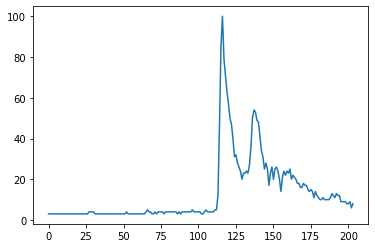

In [145]:
#Checking if the data is statutory or not, it seems that the data is not statutory 
plt.plot(new_df['Number of searches'])


<AxesSubplot:title={'center':'US Zoom search report from 2018-2021'}>

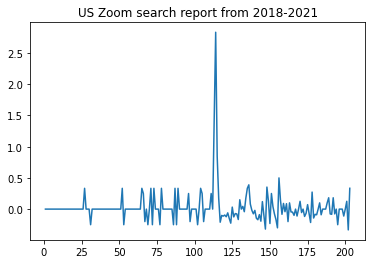

In [120]:
# changing the data to statutory by using pct_change
new_df['percent_change']=new_df['Number of searches'].pct_change()
plt.title('US Zoom search report from 2018-2021')
  
new_df['percent_change'].plot()

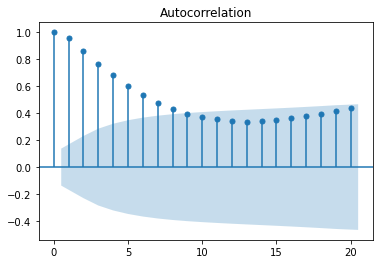

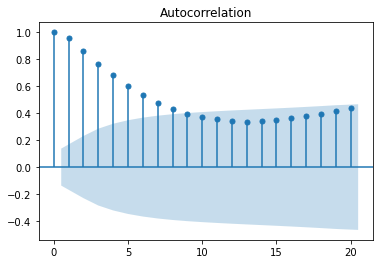

In [142]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(new_df[['Number of searches']], lags = 20)
#For this ACF plot, x axis shows the lag. 

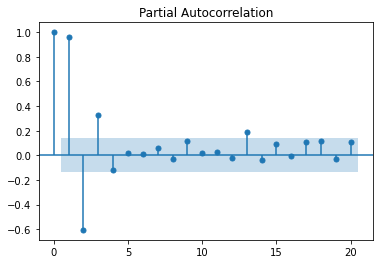

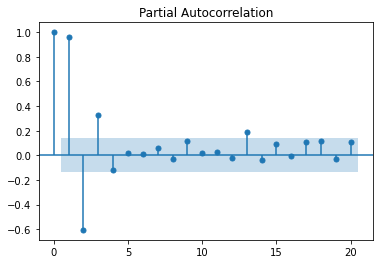

In [143]:
plot_pacf(new_df[['Number of searches']], lags = 20)

b. Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset

* i decide to use ARMA model as ACF shows a gradually decreasing trend while the PACF cuts after 2 lags, i think ARMA will be the best model to forcaste the data.

c. Run either an ARMA, ARIMA, or SARIMA on it

In [207]:
from statsmodels.tsa.arima_model import ARMA

In [203]:
# model(1,2)
model = ARMA(new_df['Number of searches'],order=(1,2))
results = model.fit()

/Users/anushakatta/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [205]:
results_df = pd.DataFrame(results.forecast(steps=20)[0])
results_df.head(10)

,0
0,10.328458
1,11.499981
2,11.621109
3,11.728934
4,11.824917
5,11.910359
6,11.986418
7,12.054124
8,12.114394
9,12.168045


<AxesSubplot:title={'center':'search result for 10 day Forecast'}>

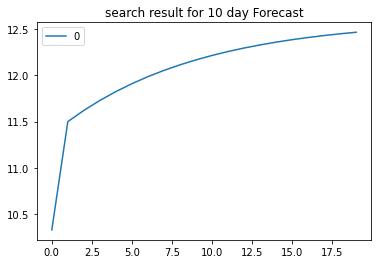

In [206]:
results_df.plot(title = 'search result for 10 day Forecast')

In [204]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:     Number of searches   No. Observations:                  204
Model:                     ARMA(1, 2)   Log Likelihood                -567.121
Method:                       css-mle   S.D. of innovations              3.869
Date:                Sat, 04 Dec 2021   AIC                           1144.242
Time:                        05:17:41   BIC                           1160.832
Sample:                             0   HQIC                          1150.953
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.6029      4.610      2.734      0.006       3.567      21.638
ar.L1.Number of searches     0.8902      0.034     26.522      0.000       0.824       0.956
ma.L1.Number of searches     0.7080      0.071     10.012      0.000       0.569       0.847
ma.L2.Number of searches     0.2382      0.075      3.157      0.002       0.090       0.386
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1234           +0.0000j            1.1234            0.0000
MA.1           -1.4858           -1.4106j            2.0488           -0.3791
MA.2           -1.4858           +1.4106j            2.0488            0.3791
-----------------------------------------------------------------------------
"""

d. Explain the results

* it seems that model(1,2) has less AIC, BIC and p valuse compared to model(1,1). we have to take low values to have a good forcasting. AIC shows low value that means it is a good model. if model that has high dimensional reality then it means the models are not true models in AIC.

e. Discuss your findings with your group and explain what trend someone else chose and why they chose the model they did

* we did not discussed till option e but i personally think that the data which i took is a cyclical trend data, as there is a increase because of economic incidents and it deosn't always happen. the model i choosed is ARMA(1,2) as it shows the low p-varience and AIC compared to other ARMA models. 

2. What is a fourier transform? Perform one on y = np.cos(x/2), and both show (with code)
and explain the key elements.

* Fourier transform is a mathematical tool which is used for frequency analysis of signals. it is also known as frequency domain representation of original signal. Fourier transform is the input tool that is used to decompose an image into its sine and cosine components

* key elements for the fourier transform graph are amplitude which showed as red line on the below graph which represents a peek point of frequency. x axis takes as frequency and y axis represents the intensity.

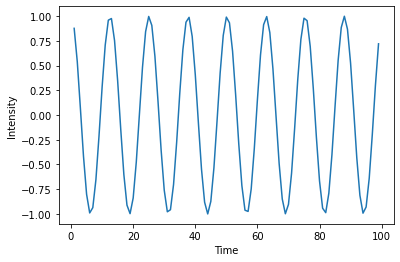

In [208]:
from scipy import signal

x = np.arange(1,100,1)
y = np.cos(x/2)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

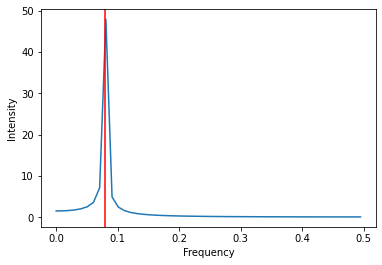

In [217]:
psd = np.abs(np.fft.rfft(y))
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,psd)
plt.axvline(1/(4*np.pi),c='r')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()